<a href="https://colab.research.google.com/github/dazero37/mid-pj/blob/main/mid_pj_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 행복 지수 상위 20개 국가

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 리스트
file_paths = [
    "/content/WHR_2018.csv",
    "/content/WHR_2019.csv",
    "/content/WHR_2020.csv",
    "/content/WHR_2021.csv",
    "/content/WHR_2022.csv"
]

# 여러 연도의 데이터를 하나로 합치기 위한 빈 리스트 생성
dfs = []

# 각 파일을 읽고 데이터프레임 리스트에 추가
for file in file_paths:
    df = pd.read_csv(file)

    # 컬럼명 정리 (파일마다 컬럼명이 다를 가능성이 있음)
    if 'Country' in df.columns and 'Happiness Score' in df.columns:
        df = df[['Country', 'Happiness Score', 'GDP per capita', 'Social Support', 'Healthy Life Expectancy',
                 'Freedom to make life choices', 'Generosity']]
        df.columns = ['country', 'happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                      'freedom_to_make_life_choices', 'generosity']
    elif 'country' in df.columns and 'happiness_score' in df.columns:
        df = df[['country', 'happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                 'freedom_to_make_life_choices', 'generosity']]
    else:
        print(f"⚠️ {file}에서 필요한 컬럼을 찾을 수 없습니다.")
        continue

    dfs.append(df)

# 모든 연도의 데이터를 하나로 합치기
merged_df = pd.concat(dfs)

# 국가별 평균 행복 점수 계산 후 상위 20개 국가 선정 (reset_index()로 인덱스 해제)
top_20_countries = merged_df.groupby('country').mean().nlargest(20, 'happiness_score').reset_index()

# 컬럼명 확인 (오류 방지)
print("Columns in top_20_countries:", top_20_countries.columns)

Columns in top_20_countries: Index(['country', 'happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices',
       'generosity'],
      dtype='object')


## 건강 기대 수명과 행복 지수의 상관관계

📊 건강 기대 수명과 행복 지수의 상관 계수: 0.787


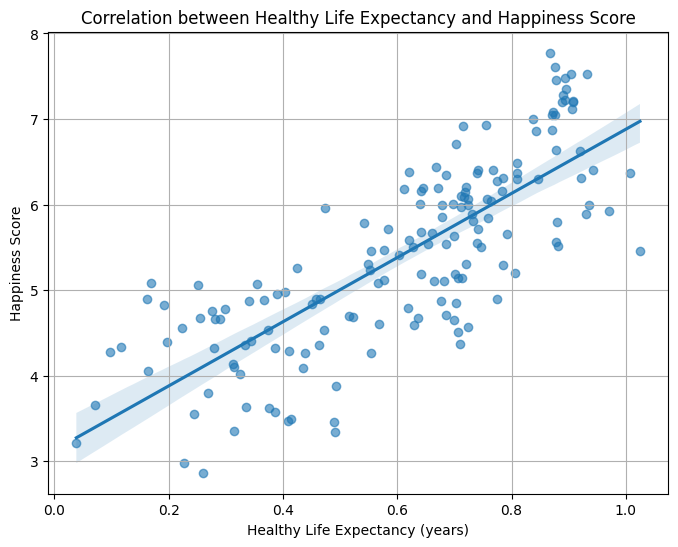

In [63]:
# 국가별 평균 값 계산
avg_data = merged_df.groupby('country')[['happiness_score', 'healthy_life_expectancy']].mean().reset_index()

# 상관계수 계산
correlation = avg_data[['happiness_score', 'healthy_life_expectancy']].corr().iloc[0, 1]

# 상관계수 출력
print(f"📊 건강 기대 수명과 행복 지수의 상관 계수: {correlation:.3f}")

# 시각화 (산점도 + 회귀선)
plt.figure(figsize=(8, 6))
sns.regplot(x=avg_data['healthy_life_expectancy'], y=avg_data['happiness_score'], scatter_kws={'alpha':0.6})
plt.xlabel("Healthy Life Expectancy (years)")
plt.ylabel("Happiness Score")
plt.title("Correlation between Healthy Life Expectancy and Happiness Score")
plt.grid(True)
plt.show()

<ipython-input-29-754aacd2138d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_countries['happiness_score'], y=top_20_countries['country'], palette="viridis")


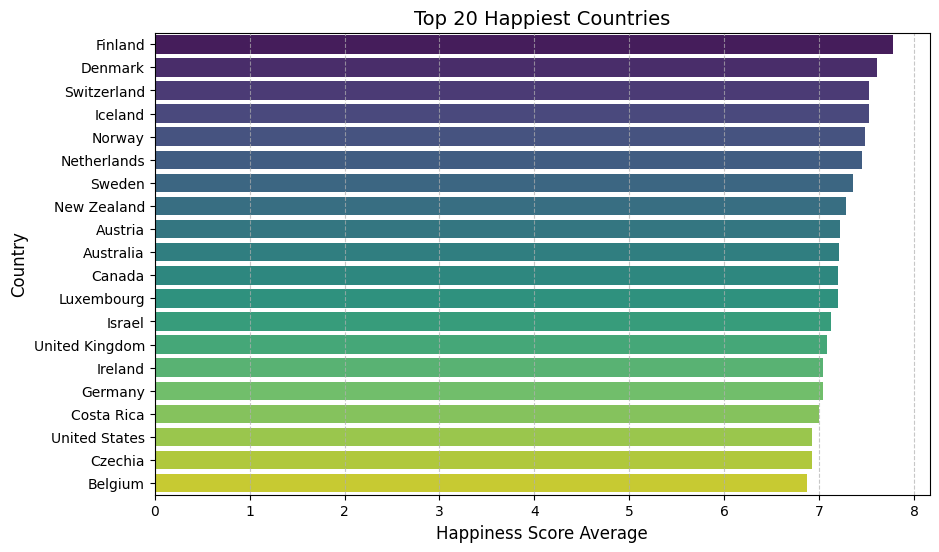

In [29]:
# 결과 출력
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_countries['happiness_score'], y=top_20_countries['country'], palette="viridis")

plt.xlabel("Happiness Score Average", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Top 20 Happiest Countries", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [30]:
top_20_countries.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity
0,Finland,7.77454,1.453638,1.408505,0.867454,0.673263,0.149534
1,Denmark,7.61132,1.503190,1.403490,0.876667,0.669008,0.234959
2,Switzerland,7.52198,1.570955,1.370481,0.931507,0.638191,0.227811
3,Iceland,7.52090,1.493500,1.461513,0.903169,0.669196,0.326466
4,Norway,7.47860,1.581641,1.401235,0.893014,0.678040,0.262197


## 건강 기대 수명과 행복 지수 관계 - 산점도



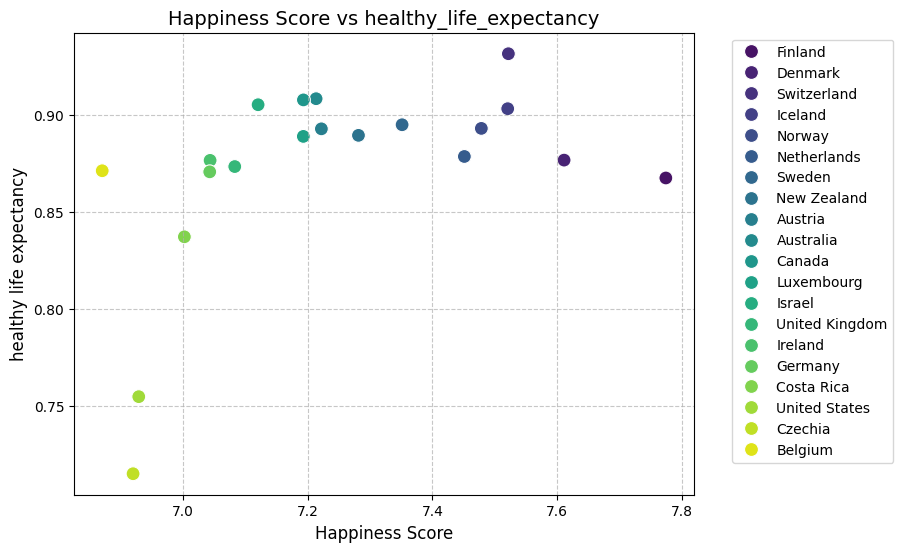

In [31]:
# 산점도 (Scatter Plot) - 행복 지수 vs 건강 기대 수명(healthy_life_expectancy) 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x=top_20_countries['happiness_score'], y=top_20_countries['healthy_life_expectancy'],
                hue=top_20_countries['country'], palette="viridis", s=100)
plt.xlabel("Happiness Score", fontsize=12)
plt.ylabel("healthy life expectancy", fontsize=12)
plt.title("Happiness Score vs healthy_life_expectancy", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle="--", alpha=0.7)
plt.show()


✅ 건강 기대 수명이 높으면 행복 지수 높음


## 삶의 선택 자유도와 행복 지수 관계 - 산점도

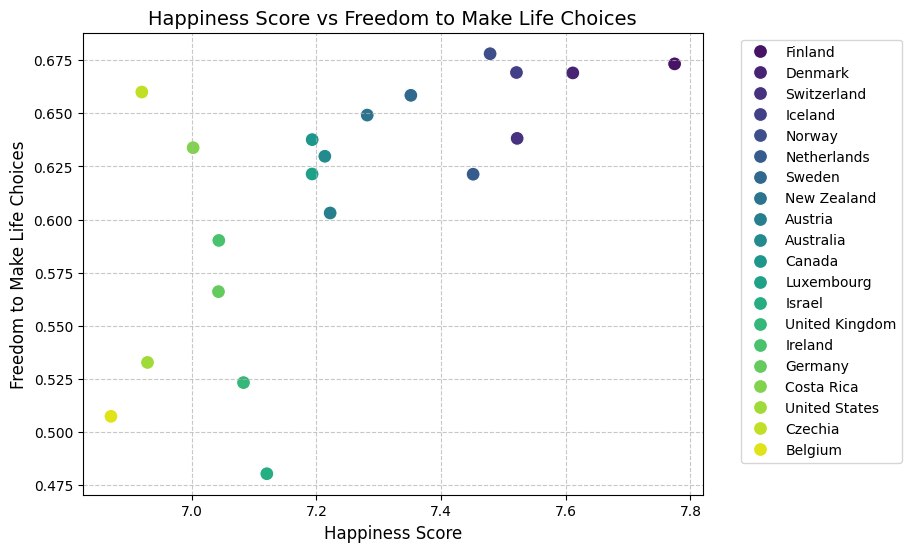

In [32]:
# 산점도 (Scatter Plot) - 행복 지수 vs 삶의 선택 자유도 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x=top_20_countries['happiness_score'], y=top_20_countries['freedom_to_make_life_choices'],
                hue=top_20_countries['country'], palette="viridis", s=100)
plt.xlabel("Happiness Score", fontsize=12)
plt.ylabel("Freedom to Make Life Choices", fontsize=12)
plt.title("Happiness Score vs Freedom to Make Life Choices", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle="--", alpha=0.7)
plt.show()

✅ 삶의 선택 자유도가 높으면 행복 지수 높은 편

## 상위 20개 국가, 하위 20개 국가 - 건강 기대 수명, 삶의 선택 자유도 (평균) 비교

<Figure size 1000x600 with 0 Axes>

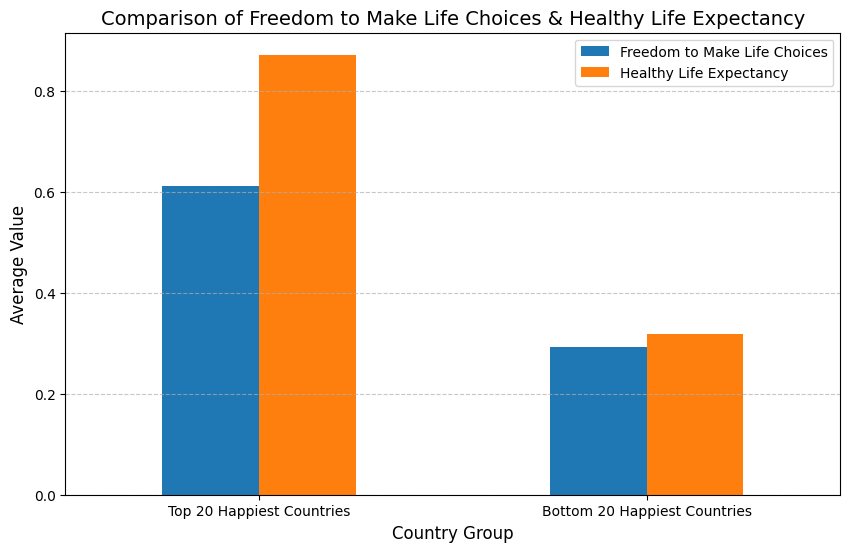

Average values for the Top 20 Happiest Countries:
   - Freedom to Make Life Choices: 0.612
   - Healthy Life Expectancy: 0.872
Average values for the Bottom 20 Happiest Countries:
   - Freedom to Make Life Choices: 0.292
   - Healthy Life Expectancy: 0.318


In [33]:
# 국가별 평균 행복 점수 계산 후 상위 20개, 하위 20개 국가 선정
grouped_df = merged_df.groupby('country').mean().reset_index()

# 행복 지수 상위 20개 국가 & 하위 20개 국가 선택
top_20 = grouped_df.nlargest(20, 'happiness_score')
bottom_20 = grouped_df.nsmallest(20, 'happiness_score')

# 상위 20개 국가 평균 값
top_20_freedom = top_20['freedom_to_make_life_choices'].mean()
top_20_life_expectancy = top_20['healthy_life_expectancy'].mean()

# 하위 20개 국가 평균 값
bottom_20_freedom = bottom_20['freedom_to_make_life_choices'].mean()
bottom_20_life_expectancy = bottom_20['healthy_life_expectancy'].mean()

# 비교 데이터 생성
comparison_df = pd.DataFrame({
    'Category': ['Top 20 Happiest Countries', 'Bottom 20 Happiest Countries'],
    'Freedom to Make Life Choices': [top_20_freedom, bottom_20_freedom],
    'Healthy Life Expectancy': [top_20_life_expectancy, bottom_20_life_expectancy]
})

# 막대 그래프 (Bar Plot) - 비교 시각화
plt.figure(figsize=(10, 6))
comparison_df.set_index('Category').plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Freedom to Make Life Choices & Healthy Life Expectancy", fontsize=14)
plt.xlabel("Country Group", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Freedom to Make Life Choices", "Healthy Life Expectancy"])
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

# 출력 (숫자 비교)
print("Average values for the Top 20 Happiest Countries:")
print(f"   - Freedom to Make Life Choices: {top_20_freedom:.3f}")
print(f"   - Healthy Life Expectancy: {top_20_life_expectancy:.3f}")

print("Average values for the Bottom 20 Happiest Countries:")
print(f"   - Freedom to Make Life Choices: {bottom_20_freedom:.3f}")
print(f"   - Healthy Life Expectancy: {bottom_20_life_expectancy:.3f}")


✅ 상위 20개 국가와 하위 20개 국가를 비교했을 때 확실히 큰 차이가 보임

## 건강 기대 수명 이상치 파악 - 산점도

건강 기대 수명이 예상보다 낮은 행복 지수 상위 20개 국가:
           country  happiness_score  healthy_life_expectancy
155  United States          6.92912                 0.754724
39         Czechia          6.92000                 0.715000


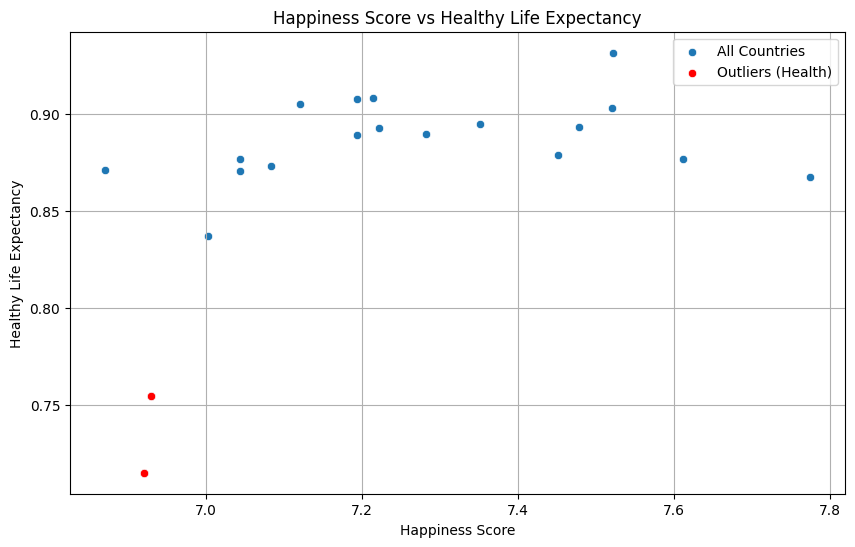

In [34]:
# 이상치 탐지 (건강 기대 수명)
q1 = top_20_countries['healthy_life_expectancy'].quantile(0.25)
q3 = top_20_countries['healthy_life_expectancy'].quantile(0.75)
iqr = q3 - q1  # IQR 계산
low_outlier_threshold = q1 - 1.5 * iqr
outliers_health = top_20[top_20['healthy_life_expectancy'] < low_outlier_threshold]

# 이상치 국가 출력
print("건강 기대 수명이 예상보다 낮은 행복 지수 상위 20개 국가:")
print(outliers_health[['country', 'happiness_score', 'healthy_life_expectancy']])

# 이상치 시각화 (산점도)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_20['happiness_score'], y=top_20['healthy_life_expectancy'], label="All Countries")
sns.scatterplot(x=outliers_health['happiness_score'], y=outliers_health['healthy_life_expectancy'], color="red", label="Outliers (Health)")
plt.xlabel("Happiness Score")
plt.ylabel("Healthy Life Expectancy")
plt.title("Happiness Score vs Healthy Life Expectancy")
plt.legend()
plt.grid()
plt.show()

 <건강 기대 수명과 행복 지수를 비교>

📌 미국과 체코에서 이상치 확인

✅ 가설 : 미국과 체코는 의료시스템의 불평등이 있을 것이다

 미국
 - 민간 의료 중심으로 의료비 매우 큼, 소득 격차에 의료 접근성 차이 (GDP 기준 국가별 의료비 지출)
 - 미국의 비만율이 세계에서 가장 높은 수준 (국가별 비만율)

체코
- 세계에서 맥주 소비량이 가장 많음 (알코올 소비량)
- 의료 불평등이큼 (사회경제적 지위에 따른 건강 상태 인식)


(아래 외부데이터로 가설 증명)


## 삶의 선택 자유도 이상치 파악 - 산점도, 박스 플롯

삶의 선택 자유도가 예상보다 낮은 행복 지수 상위 20개 국가:
Empty DataFrame
Columns: [country, happiness_score, freedom_to_make_life_choices]
Index: []


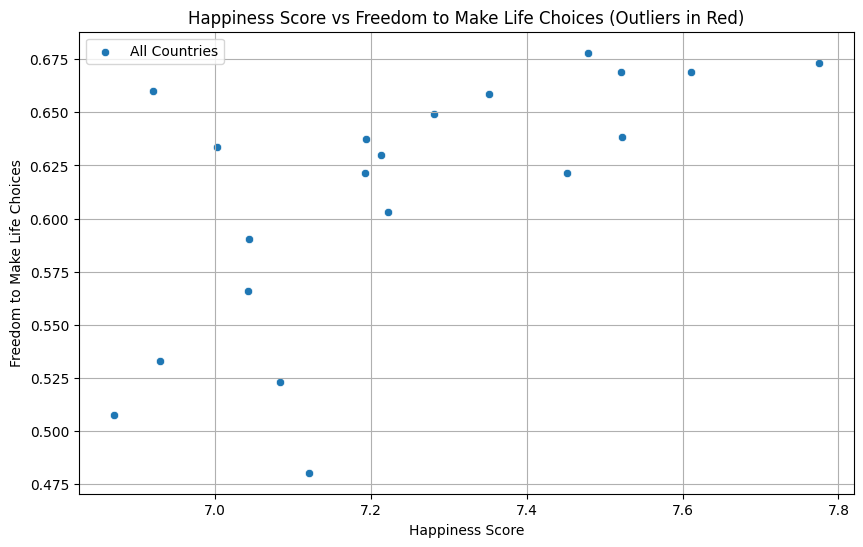

In [35]:
# 이상치 탐지 (삶의 선택 자유도)
q1_freedom = top_20['freedom_to_make_life_choices'].quantile(0.25)
q3_freedom = top_20['freedom_to_make_life_choices'].quantile(0.75)
iqr_freedom = q3_freedom - q1_freedom
low_outlier_threshold_freedom = q1_freedom - 1.5 * iqr_freedom
outliers_freedom = top_20[top_20['freedom_to_make_life_choices'] < low_outlier_threshold_freedom]

print("삶의 선택 자유도가 예상보다 낮은 행복 지수 상위 20개 국가:")
print(outliers_freedom[['country', 'happiness_score', 'freedom_to_make_life_choices']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_20['happiness_score'], y=top_20['freedom_to_make_life_choices'], label="All Countries")
sns.scatterplot(x=outliers_freedom['happiness_score'], y=outliers_freedom['freedom_to_make_life_choices'], color="red", label="Outliers (Freedom)")
plt.xlabel("Happiness Score")
plt.ylabel("Freedom to Make Life Choices")
plt.title("Happiness Score vs Freedom to Make Life Choices (Outliers in Red)")
plt.legend()
plt.grid()
plt.show()

<삶의 선택 자유도와 행복지수 비교>

📌 삶의 선택 자유도가 높으면 행복지수가 높음을 알 수 있음

✅ 가설 : 삶의 선택 자유도가 행복 지수에 중요한 영향을 미친다

(단, 하위 20개 국가에서 삶의 선택 자유도가 낮으면 행복지수가 낮음을 확인 했을 때 가설이 맞다고 주장할 수 있음)

<ipython-input-36-9f86b520bc2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="freedom_to_make_life_choices", data=combined_df, palette={"Top 20 Happiest": "red", "Bottom 20 Least Happy": "blue"})


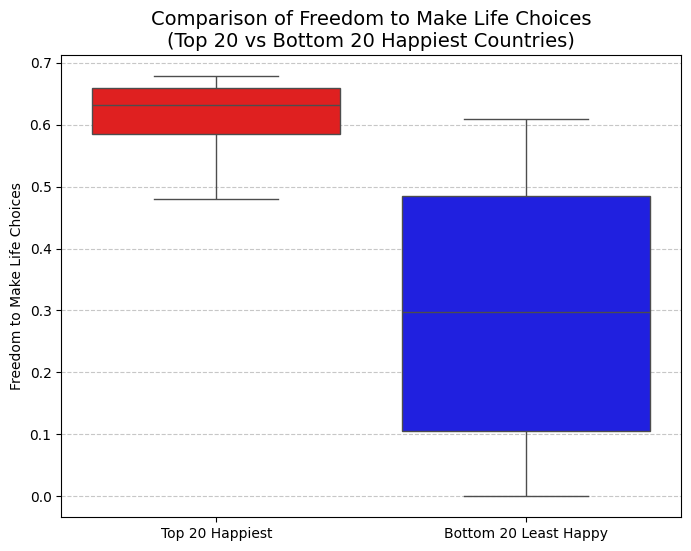

🔻 삶의 선택 자유도가 예상보다 낮은 행복 지수 상위 20개 국가:
Empty DataFrame
Columns: [country, happiness_score, freedom_to_make_life_choices]
Index: []
🔻 삶의 선택 자유도가 예상보다 낮은 행복 지수 하위 20개 국가:
Empty DataFrame
Columns: [country, happiness_score, freedom_to_make_life_choices]
Index: []


In [36]:
# 두 개의 데이터프레임을 합쳐서 하나의 박스플롯으로 표현
top_20["Group"] = "Top 20 Happiest"
bottom_20["Group"] = "Bottom 20 Least Happy"

combined_df = pd.concat([top_20, bottom_20])  # 두 데이터 결합

# 한 그래프에서 두 그룹 비교 (박스 플롯)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Group", y="freedom_to_make_life_choices", data=combined_df, palette={"Top 20 Happiest": "red", "Bottom 20 Least Happy": "blue"})

plt.title("Comparison of Freedom to Make Life Choices\n(Top 20 vs Bottom 20 Happiest Countries)", fontsize=14)
plt.xlabel("")
plt.ylabel("Freedom to Make Life Choices")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# 이상치 국가 출력 (상위 20개)
q1_top = top_20['freedom_to_make_life_choices'].quantile(0.25)
q3_top = top_20['freedom_to_make_life_choices'].quantile(0.75)
iqr_top = q3_top - q1_top
low_outlier_threshold_top = q1_top - 1.5 * iqr_top

outliers_top = top_20[top_20['freedom_to_make_life_choices'] < low_outlier_threshold_top]
print("🔻 삶의 선택 자유도가 예상보다 낮은 행복 지수 상위 20개 국가:")
print(outliers_top[['country', 'happiness_score', 'freedom_to_make_life_choices']])

# 이상치 국가 출력 (하위 20개)
q1_bottom = bottom_20['freedom_to_make_life_choices'].quantile(0.25)
q3_bottom = bottom_20['freedom_to_make_life_choices'].quantile(0.75)
iqr_bottom = q3_bottom - q1_bottom
low_outlier_threshold_bottom = q1_bottom - 1.5 * iqr_bottom

outliers_bottom = bottom_20[bottom_20['freedom_to_make_life_choices'] < low_outlier_threshold_bottom]
print("🔻 삶의 선택 자유도가 예상보다 낮은 행복 지수 하위 20개 국가:")
print(outliers_bottom[['country', 'happiness_score', 'freedom_to_make_life_choices']])

# 외부 데이터

## GDP 기준 국가별 의료비 지출
OECD health expenditure and financing 데이터 불러오기

https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_SHA%40DF_SHA&df[ag]=OECD.ELS.HD&dq=USA%2BGBR%2BCHE%2BSWE%2BNOR%2BNZL%2BNLD%2BLUX%2BISR%2BIRL%2BISL%2BDEU%2BFIN%2BDNK%2BCRI%2BCAN%2BBEL%2BAUT%2BAUS%2BCZE.A.EXP_HEALTH.PT_B1GQ.HF3.......&pd=2018%2C2022&to[TIME_PERIOD]=false&vw=tb&lb=nm

2018-2022 각 국가의 GDP 기준 가계가 직접 부담한 의료비가 차지하는 비율(%)



In [37]:
health_system = pd.read_csv("/content/Health expenditure and financing.csv")
health_system.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,ISL,Iceland,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,CAN,Canada,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,CAN,Canada,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,DEU,Germany,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,FIN,Finland,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One


In [38]:
# 컬럼 정리
health_system.columns = health_system.columns.str.strip()  # 컬럼명 공백 제거

# 필요한 컬럼만 선택
filtered_columns = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
health_system_F = health_system[filtered_columns]

# NaN 값 제거
health_system_F = health_system.dropna(subset=['OBS_VALUE'])

health_system_F.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,ISL,Iceland,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
1,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,CAN,Canada,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
2,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,CAN,Canada,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
3,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,DEU,Germany,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One
4,DATAFLOW,OECD.ELS.HD:DSD_SHA@DF_SHA(1.0),Health expenditure and financing,I,FIN,Finland,A,Annual,EXP_HEALTH,Expenditure,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Units,1,One


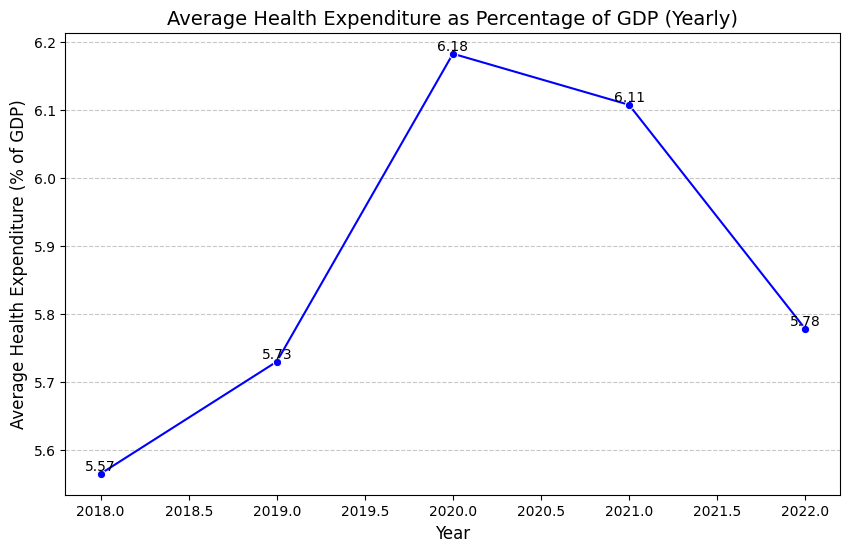

In [39]:
# TIME_PERIOD를 숫자로 변환 (문자열일 경우)
health_system_F['TIME_PERIOD'] = pd.to_numeric(health_system_F['TIME_PERIOD'], errors='coerce')

# 년도별 평균 계산
yearly_avg = health_system_F.groupby("TIME_PERIOD")["OBS_VALUE"].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker='o', color='b')

plt.title("Average Health Expenditure as Percentage of GDP (Yearly)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Health Expenditure (% of GDP)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# 값 표시
for x, y in zip(yearly_avg.index, yearly_avg.values):
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

<연도별 상위 20개 국가 의료비 평균>

📌 코로나 19였던 2020-2021에 의료비 지출이 급격히 올라감

In [40]:
import pandas as pd

# 필요한 컬럼 선택 및 NaN 제거
filtered_columns = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
health_system_F = health_system_F[filtered_columns].dropna(subset=['OBS_VALUE'])

# 평균 의료 지출 비율을 20개 국가에 대해 표로 출력
avg_expenditure_20 = health_system_F.groupby('Reference area')['OBS_VALUE'].mean().reset_index()

# 내림차순 정렬
avg_expenditure_20 = avg_expenditure_20.sort_values(by='OBS_VALUE', ascending=False)

avg_expenditure_20

,Reference area,OBS_VALUE
19,United States,9.475500
14,New Zealand,8.425833
17,Switzerland,7.086300
8,Germany,6.883600
3,Canada,6.727800
2,Belgium,6.499400
1,Austria,6.480800
18,United Kingdom,6.215400
16,Sweden,6.197200
0,Australia,5.895700


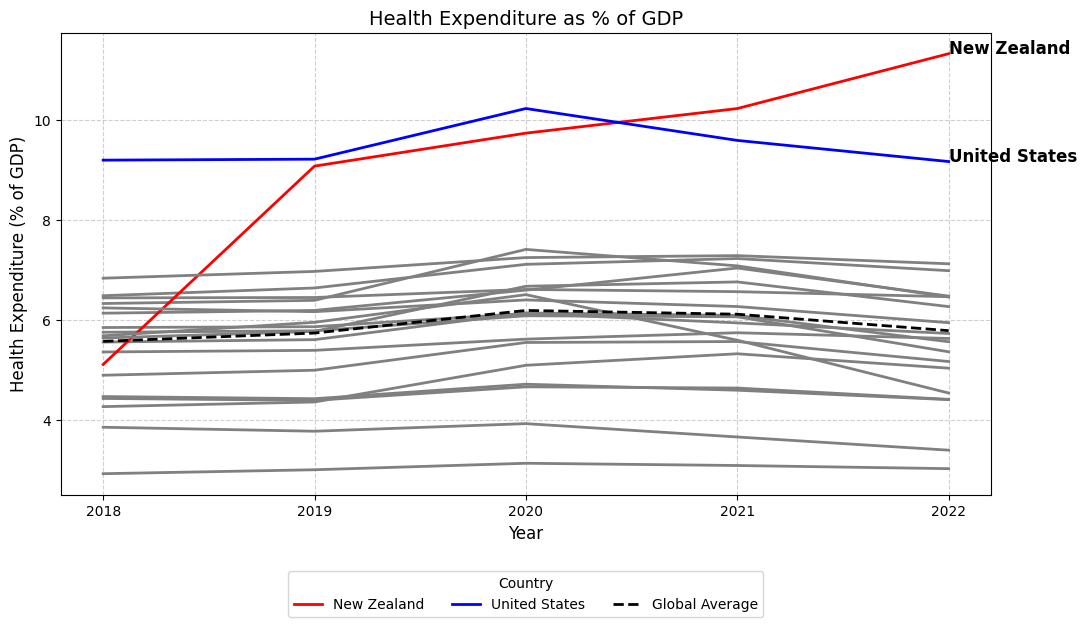

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별 전체 국가 평균 계산
avg_health_spending = health_system_F.groupby('TIME_PERIOD')['OBS_VALUE'].mean().reset_index()
avg_health_spending.rename(columns={'OBS_VALUE': 'Average Spending'}, inplace=True)

# 개별 국가별 연도별 데이터와 평균 비교
yearly_data = health_system_F.groupby(['TIME_PERIOD', 'Reference area'])['OBS_VALUE'].mean().reset_index()

# 평균과의 차이 계산
yearly_data = yearly_data.merge(avg_health_spending, on='TIME_PERIOD')
yearly_data['Deviation'] = yearly_data['OBS_VALUE'] - yearly_data['Average Spending']

# 상위 2개 의료 지출 국가 찾기
latest_year_data = yearly_data[yearly_data['TIME_PERIOD'] == yearly_data['TIME_PERIOD'].max()]
top_2_countries = latest_year_data.nlargest(2, 'OBS_VALUE')['Reference area'].values

# 색상 설정: 상위 2개 국가는 강조 색 (빨강, 파랑)
def get_color(country):
    if country == top_2_countries[0]:  # 1위 국가
        return 'red'
    elif country == top_2_countries[1]:  # 2위 국가
        return 'blue'
    else:  # 나머지 국가
        return 'gray'

yearly_data['Color'] = yearly_data['Reference area'].apply(get_color)

# 시각화
plt.figure(figsize=(12, 6))

# 전체 국가들의 데이터 표시
for country in yearly_data['Reference area'].unique():
    country_data = yearly_data[yearly_data['Reference area'] == country]
    sns.lineplot(data=country_data, x='TIME_PERIOD', y='OBS_VALUE',
                 color=country_data['Color'].iloc[0], linewidth=2,
                 label=country if country_data['Color'].iloc[0] in ['red', 'blue'] else "")

# 전체 평균선 추가
sns.lineplot(data=avg_health_spending, x='TIME_PERIOD', y='Average Spending',
             color='black', linestyle='dashed', linewidth=2, label='Global Average')

# 상위 2개 국가의 레이블 추가 (2022년 값 기준)
for country in top_2_countries:
    latest_value = yearly_data[(yearly_data['Reference area'] == country) &
                               (yearly_data['TIME_PERIOD'] == yearly_data['TIME_PERIOD'].max())]
    if not latest_value.empty:
        plt.text(latest_value['TIME_PERIOD'].values[0], latest_value['OBS_VALUE'].values[0],
                 country, fontsize=12, color='black', weight='bold')

# 그래프 설정
plt.title("Health Expenditure as % of GDP", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Health Expenditure (% of GDP)", fontsize=12)
plt.xticks(yearly_data['TIME_PERIOD'].unique())
plt.legend(title="Country", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(linestyle="--", alpha=0.6)
plt.show()



📌 결론

미국과 뉴질랜드의 의료비 지출이 큼


✅ 가설 증명 : 미국이 의료비 지출이 크다는 걸 볼 수 있음 (의료비 비쌈)

✅ 가설 : 뉴질랜드 의료비 지출 높은 원인은 ?


📌 뉴질랜드의 높은 GDP 대비 의료비 지출 이유

- 공공 의료 시스템의 높은 운영 비용
- 의료비용 ⬆️ 으로 인해 정부의 지출 부담 ⬆️
- 의료진 급여 ⬆️, 병원 운영비 ⬆️ 등으로 인해 국가 의료 예산 ⬆️ .
고령화와 만성질환 ⬆️
- 특히 비만율이 높은 국가이기 때문에 당뇨병, 심혈관 질환 같은 만성질환 관리 비용 ⬆️

## 국가별 비만율
OECD Body Weight

https://data-explorer.oecd.org/vis?lc=en&tm=obesity&pg=0&snb=11&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_LVNG%40DF_HEALTH_LVNG_BW&df[ag]=OECD.ELS.HD&df[vs]=1.0&dq=GBR%2BUSA%2BCHE%2BSWE%2BNOR%2BNZL%2BNLD%2BLUX%2BISR%2BIRL%2BISL%2BDEU%2BFIN%2BDNK%2BCZE%2BCRI%2BCAN%2BBEL%2BAUS%2BAUT.A.SP_OBS.._T..&pd=2018%2C2022&to[TIME_PERIOD]=false

2018-2022 비만 인구 비율

In [42]:
obese = pd.read_csv("/content/obese.csv")
obese.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,SWE,Sweden,A,Annual,SP_OBS,Share of population who are obese,...,2019,NaN,13.7,NaN,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,DEU,Germany,A,Annual,SP_OBS,Share of population who are obese,...,2021,NaN,16.7,NaN,A,Normal value,0,Units,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,DNK,Denmark,A,Annual,SP_OBS,Share of population who are obese,...,2021,NaN,18.5,NaN,A,Normal value,0,Units,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,CRI,Costa Rica,A,Annual,SP_OBS,Share of population who are obese,...,2018,NaN,31.2,NaN,A,Normal value,0,Units,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,NZL,New Zealand,A,Annual,SP_OBS,Share of population who are obese,...,2018,NaN,32.5,NaN,A,Normal value,0,Units,NaN,NaN


In [43]:
# 컬럼 정리
obese.columns = obese.columns.str.strip()  # 컬럼명 공백 제거

# 필요한 컬럼만 선택
filtered_columns = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
obese_F = obese[filtered_columns]

# NaN 값 제거
obese_F =obese.dropna(subset=['OBS_VALUE'])
obese_F.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,SWE,Sweden,A,Annual,SP_OBS,Share of population who are obese,...,2019,NaN,13.7,NaN,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,DEU,Germany,A,Annual,SP_OBS,Share of population who are obese,...,2021,NaN,16.7,NaN,A,Normal value,0,Units,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,DNK,Denmark,A,Annual,SP_OBS,Share of population who are obese,...,2021,NaN,18.5,NaN,A,Normal value,0,Units,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,CRI,Costa Rica,A,Annual,SP_OBS,Share of population who are obese,...,2018,NaN,31.2,NaN,A,Normal value,0,Units,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,NZL,New Zealand,A,Annual,SP_OBS,Share of population who are obese,...,2018,NaN,32.5,NaN,A,Normal value,0,Units,NaN,NaN


In [44]:
# 평균 의료 지출 비율을 20개 국가에 대해 표로 출력
avg_obese_20 = obese_F.groupby('Reference area')['OBS_VALUE'].mean().reset_index()

# 내림차순 정렬
avg_obese_20 = avg_obese_20.sort_values(by='OBS_VALUE', ascending=False)

avg_obese_20

,Reference area,OBS_VALUE
19,United States,34.650000
14,New Zealand,32.325000
4,Costa Rica,31.200000
0,Australia,28.050000
18,United Kingdom,27.200000
7,Finland,23.640000
10,Ireland,23.333333
3,Canada,21.566667
9,Iceland,21.400000
5,Czechia,19.300000


<ipython-input-45-3aefcf3bf835>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_obese_20, x='OBS_VALUE', y='Reference area', palette='coolwarm')


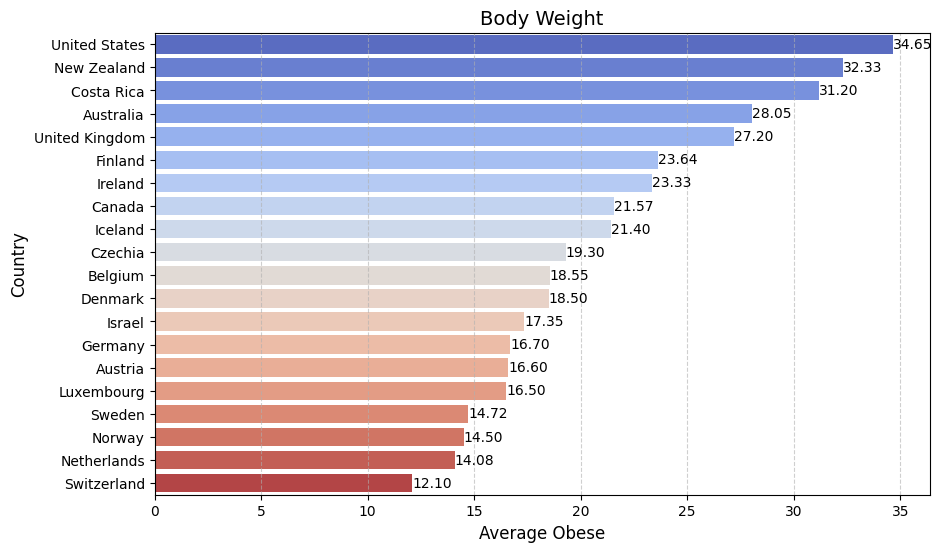

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_obese_20, x='OBS_VALUE', y='Reference area', palette='coolwarm')

# 그래프 제목 및 축 라벨 설정
plt.title("Body Weight", fontsize=14)
plt.xlabel("Average Obese", fontsize=12)
plt.ylabel("Country", fontsize=12)

# 수치 표시
for index, value in enumerate(avg_obese_20['OBS_VALUE']):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

📌 결론

미국과 뉴질랜드의 비만율이 큼

-  미국과 뉴질랜드는 비만율이 높아서 만성질환인 당뇨, 심혈관 질환에 걸릴 확률이 큼

- 따라서 미국과 뉴질랜드의 의료비 지출이 컸음을 알 수 있음

✅ 가설 : 뉴질랜드는 의료비 지출이 커도 건강 기대 수명이 높은 이유는?
- 뉴질랜드의 경우 공공의료 중심 국가여서 의료 불평등이 크지 않아 의료 시스템 접근이 쉬움 (사회경제적 지위에 따른 건강 상태 인식)

### 국가별 비만율_한국포함

In [72]:
obese_korea= pd.read_csv("/content/obese_korea.csv")
obese_korea.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,NZL,New Zealand,A,Annual,SP_OBS,Share of population who are obese,...,2019,NaN,31.3,NaN,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,DEU,Germany,A,Annual,SP_OBS,Share of population who are obese,...,2021,NaN,16.7,NaN,A,Normal value,0,Units,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,DNK,Denmark,A,Annual,SP_OBS,Share of population who are obese,...,2021,NaN,18.5,NaN,A,Normal value,0,Units,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,KOR,Korea,A,Annual,SP_OBS,Share of population who are obese,...,2018,NaN,4.3,NaN,A,Normal value,0,Units,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,KOR,Korea,A,Annual,SP_OBS,Share of population who are obese,...,2020,NaN,4.2,NaN,A,Normal value,0,Units,NaN,NaN


In [74]:
# 컬럼 정리
obese_korea.columns = obese_korea.columns.str.strip()  # 컬럼명 공백 제거

# 필요한 컬럼만 선택
filtered_columns = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
obese_korea_F = obese_korea[filtered_columns]

# NaN 값 제거
obese__korea_F =obese_korea.dropna(subset=['OBS_VALUE'])
obese_korea_F

,Reference area,TIME_PERIOD,OBS_VALUE
0,New Zealand,2019,31.3
1,Germany,2021,16.7
2,Denmark,2021,18.5
3,Korea,2018,4.3
4,Korea,2020,4.2
...,...,...,...
57,Norway,2022,16.0
58,United Kingdom,2018,27.7
59,United Kingdom,2019,28.0
60,Ireland,2019,23.0


In [75]:
# 평균 의료 지출 비율을 20개 국가에 대해 표로 출력
avg_obese_korea = obese_korea_F.groupby('Reference area')['OBS_VALUE'].mean().reset_index()

# 내림차순 정렬
avg_obese_korea = avg_obese_korea.sort_values(by='OBS_VALUE', ascending=False)
avg_obese_korea


,Reference area,OBS_VALUE
20,United States,34.650000
15,New Zealand,32.325000
4,Costa Rica,31.200000
0,Australia,28.050000
19,United Kingdom,27.200000
7,Finland,23.640000
10,Ireland,23.333333
3,Canada,21.566667
9,Iceland,21.400000
5,Czechia,19.300000


<ipython-input-76-aa96ab568c7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_obese_korea, x='OBS_VALUE', y='Reference area', palette='coolwarm')


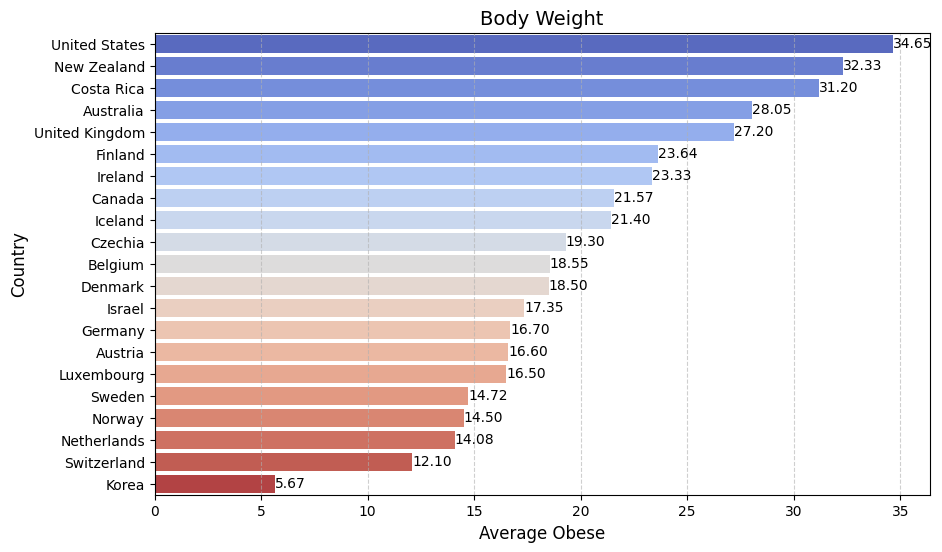

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_obese_korea, x='OBS_VALUE', y='Reference area', palette='coolwarm')

# 그래프 제목 및 축 라벨 설정
plt.title("Body Weight", fontsize=14)
plt.xlabel("Average Obese", fontsize=12)
plt.ylabel("Country", fontsize=12)

# 수치 표시
for index, value in enumerate(avg_obese_korea['OBS_VALUE']):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## 사회경제적 지위에 따른 건강 상태 인식(소득 하위 20% 그룹)

OECD Perceived health status by socio-economic status 데이터 불러오기

https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_STAT%40DF_PHS_SES&df[ag]=OECD.ELS.HD&dq=LUX%2BIRL%2BISR%2BCZE%2BISL%2BFIN%2BNOR%2BNLD%2BDNK%2BSWE%2BGBR%2BAUT%2BBEL%2BCAN%2BDEU%2BCHE%2BNZL%2BUSA%2BAUS.A...Y_GE15._T.Q1....G..&pd=2018%2C2022&to[TIME_PERIOD]=false

2018-2022 사회경제적 지위에 따른 건강 상태 인식 (소득 그룹 하위 20%)



**수치가 높으면**
- 건강 상태를 긍정적으로 평가
- 의료 불평등 낮음
- 의료 접근성이 높고, 예방 의료에 대한 인식이 높음
  
**수치가 낮으면**
- 건강 상태를 부정적으로 평가
- 의료 불평등 높음
- 건강 정보 접근성이 낮음


In [46]:
health_status = pd.read_csv("/content/Perceived health status by socio-economic status.csv")
health_status.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,DECIMALS,Decimals,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,CZE,Czechia,A,Annual,PHS,Perceived health status,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,ISR,Israel,A,Annual,PHS,Perceived health status,...,NaN,NaN,B,Time series break,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,USA,United States,A,Annual,PHS,Perceived health status,...,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,USA,United States,A,Annual,PHS,Perceived health status,...,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,GBR,United Kingdom,A,Annual,PHS,Perceived health status,...,NaN,NaN,B,Time series break,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# 컬럼 정리
health_status.columns = health_status.columns.str.strip()  # 컬럼명 공백 제거

# 필요한 컬럼만 선택
filtered_columns = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
health_status_F = health_status[filtered_columns]

# NaN 값 제거
health_status_F = health_status.dropna(subset=['OBS_VALUE'])

health_status_F.head()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,DECIMALS,Decimals,OBS_STATUS,Observation status,OBS_STATUS2,Observation status 2,OBS_STATUS3,Observation status 3,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,CZE,Czechia,A,Annual,PHS,Perceived health status,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,ISR,Israel,A,Annual,PHS,Perceived health status,...,NaN,NaN,B,Time series break,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,USA,United States,A,Annual,PHS,Perceived health status,...,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,USA,United States,A,Annual,PHS,Perceived health status,...,NaN,NaN,D,Definition differs,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_STAT@DF_PHS_SES(1.0),Perceived health status by socio-economic status,I,GBR,United Kingdom,A,Annual,PHS,Perceived health status,...,NaN,NaN,B,Time series break,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# 평균 의료 지출 비율을 20개 국가에 대해 표로 출력
avg_status_20 = health_status_F.groupby('Reference area')['OBS_VALUE'].mean().reset_index()

# 내림차순 정렬
avg_status_20 = avg_status_20.sort_values(by='OBS_VALUE', ascending=False)

avg_status_20

,Reference area,OBS_VALUE
13,New Zealand,85.26
0,Australia,83.60
3,Canada,80.30
10,Israel,78.88
18,United States,73.10
9,Ireland,70.80
16,Switzerland,70.18
8,Iceland,67.55
11,Luxembourg,67.06
14,Norway,66.70


<ipython-input-49-f50c0a4d2817>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_status_20, x='OBS_VALUE', y='Reference area', palette='coolwarm')


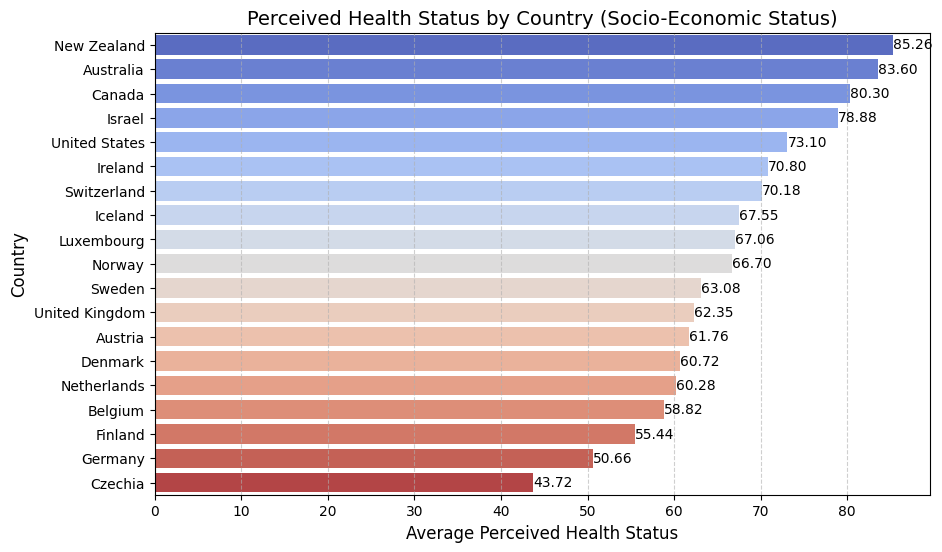

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_status_20, x='OBS_VALUE', y='Reference area', palette='coolwarm')

# 그래프 제목 및 축 라벨 설정
plt.title("Perceived Health Status by Country (Socio-Economic Status)", fontsize=14)
plt.xlabel("Average Perceived Health Status", fontsize=12)
plt.ylabel("Country", fontsize=12)

# 수치 표시
for index, value in enumerate(avg_status_20['OBS_VALUE']):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


📌 결론

✅ 가설 증명 : 체코는 사회적 지위가 낮을수록 건강 상태 인식이 낮음을 알 수 있음 (의료불평등 큼)

✅ 가설 증명 : 뉴질랜드는 사회적 지위가 낮아도 건강 상태 인식이 높음을 알 수 있음 (의료불평등 작음)

## 알코올 소비량

OECD Alcohol consumption 데이터 불러오기

https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_HEALTH_LVNG%40DF_HEALTH_LVNG_AC&df[ag]=OECD.ELS.HD&df[vs]=1.0&dq=USA%2BGBR%2BCHE%2BSWE%2BNOR%2BNZL%2BNLD%2BLUX%2BISR%2BIRL%2BISL%2BDEU%2BFIN%2BDNK%2BCZE%2BCRI%2BCAN%2BBEL%2BAUT%2BAUS.A.....&pd=2018%2C2022&to[TIME_PERIOD]=false&vw=tb

2018-2022 알코올 소비

In [50]:
alcohol = pd.read_csv("/content/Alcohol consumption.csv")
alcohol.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,SWE,Sweden,A,Annual,AC,Alcohol consumption,...,2020,NaN,7.5,NaN,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2021,NaN,10.4,NaN,D,Definition differs,0,Units,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2020,NaN,9.7,NaN,D,Definition differs,0,Units,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2019,NaN,9.5,NaN,D,Definition differs,0,Units,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2018,NaN,9.7,NaN,D,Definition differs,0,Units,NaN,NaN


In [51]:
# 컬럼 정리
alcohol.columns = alcohol.columns.str.strip()  # 컬럼명 공백 제거

# 필요한 컬럼만 선택
filtered_columns = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
alcohol_F = alcohol[filtered_columns]

# NaN 값 제거
alcohol_F = alcohol.dropna(subset=['OBS_VALUE'])

alcohol_F.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,SWE,Sweden,A,Annual,AC,Alcohol consumption,...,2020,NaN,7.5,NaN,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2021,NaN,10.4,NaN,D,Definition differs,0,Units,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2020,NaN,9.7,NaN,D,Definition differs,0,Units,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2019,NaN,9.5,NaN,D,Definition differs,0,Units,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC(...,Alcohol consumption,I,DNK,Denmark,A,Annual,AC,Alcohol consumption,...,2018,NaN,9.7,NaN,D,Definition differs,0,Units,NaN,NaN


In [52]:
# 평균 의료 지출 비율을 20개 국가에 대해 표로 출력
avg_alcohol_20 = alcohol_F.groupby('Reference area')['OBS_VALUE'].mean().reset_index()

# 내림차순 정렬
avg_alcohol_20 = avg_alcohol_20.sort_values(by='OBS_VALUE', ascending=False)

avg_alcohol_20

,Reference area,OBS_VALUE
5,Czechia,11.70
1,Austria,11.38
12,Luxembourg,11.05
8,Germany,10.75
10,Ireland,10.32
0,Australia,10.20
18,United Kingdom,9.82
6,Denmark,9.76
2,Belgium,9.20
19,United States,9.15


<ipython-input-57-1d8370ac8038>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_alcohol_20, x='OBS_VALUE', y='Reference area', palette='coolwarm')


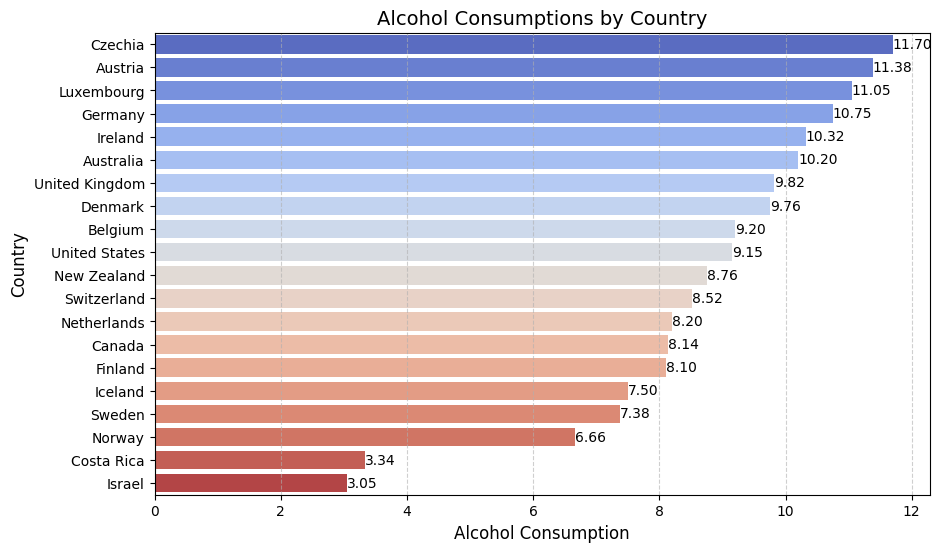

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_alcohol_20, x='OBS_VALUE', y='Reference area', palette='coolwarm')

# 그래프 제목 및 축 라벨 설정
plt.title("Alcohol Consumptions by Country", fontsize=14)
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Country", fontsize=12)

# 수치 표시
for index, value in enumerate(avg_alcohol_20['OBS_VALUE']):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

📌 결론

✅ 가설 증명 : 체코는 알코올 소비량이 많은데 의료 불평등까지 있어 건강 기대 수명이 낮을 수 밖에 없음

### 알코올 소비량_한국포함


<ipython-input-80-bbcb625a5f66>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_alcohol_korea, x='OBS_VALUE', y='Reference area', palette='coolwarm')


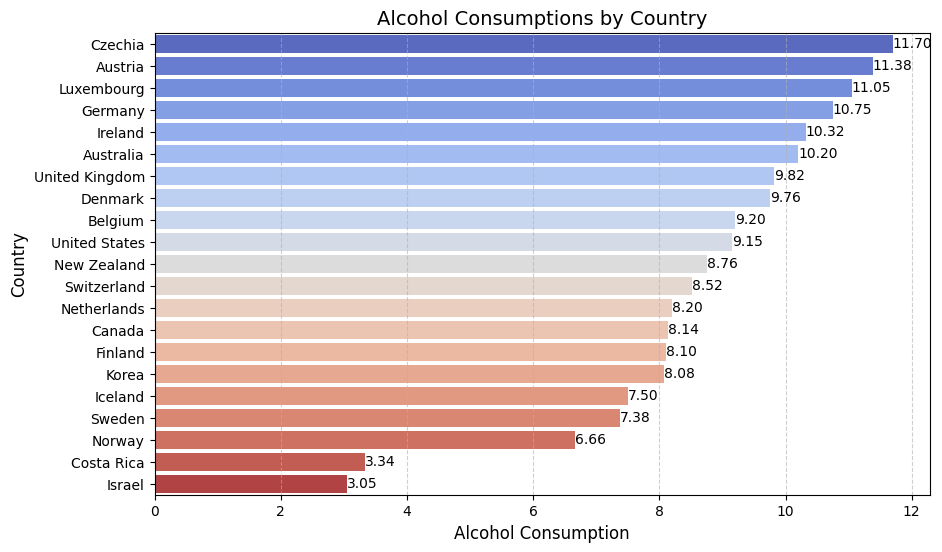

In [80]:
alcohol_korea = pd.read_csv("/content/Alcohol consumption_korea.csv")
alcohol_korea.head()

# 컬럼 정리
alcohol_korea.columns = alcohol_korea.columns.str.strip()  # 컬럼명 공백 제거

# 필요한 컬럼만 선택
filtered_columns = ['Reference area', 'TIME_PERIOD', 'OBS_VALUE']
alcohol_korea_F = alcohol_korea[filtered_columns]

# NaN 값 제거
alcohol_korea_F = alcohol_korea.dropna(subset=['OBS_VALUE'])

# 평균 의료 지출 비율을 20개 국가에 대해 표로 출력
avg_alcohol_korea = alcohol_korea_F.groupby('Reference area')['OBS_VALUE'].mean().reset_index()

# 내림차순 정렬
avg_alcohol_korea = avg_alcohol_korea.sort_values(by='OBS_VALUE', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_alcohol_korea, x='OBS_VALUE', y='Reference area', palette='coolwarm')

# 그래프 제목 및 축 라벨 설정
plt.title("Alcohol Consumptions by Country", fontsize=14)
plt.xlabel("Alcohol Consumption", fontsize=12)
plt.ylabel("Country", fontsize=12)

# 수치 표시
for index, value in enumerate(avg_alcohol_korea['OBS_VALUE']):
    plt.text(value, index, f"{value:.2f}", va='center', fontsize=10)

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

# 미국 체코 뉴질랜드 행복 지수 비교

<ipython-input-54-d89e446bcd76>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_countries["happiness_score"], y=top_20_countries["country"], palette=colors)


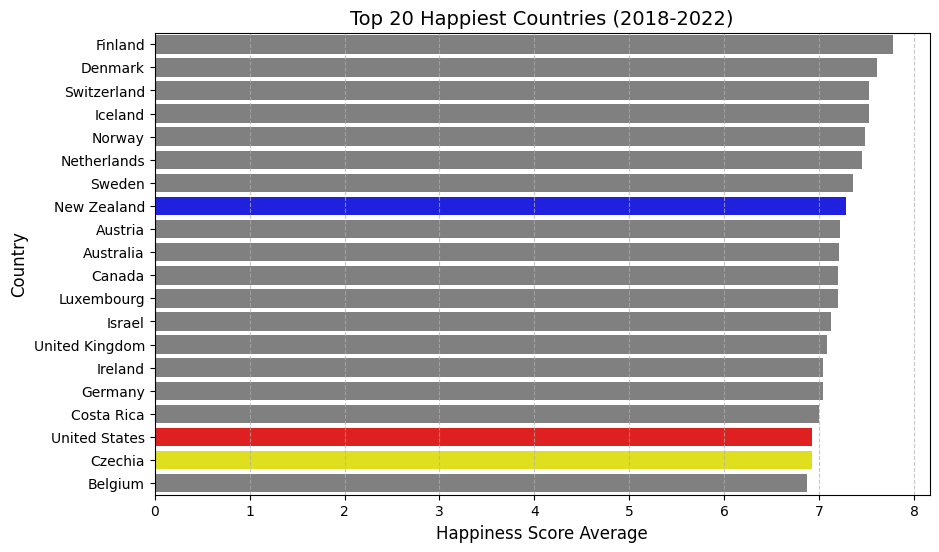

In [54]:
# 기본 회색, 특정 국가만 지정된 색상 적용
base_color = "gray"
special_colors = {"United States": "red", "Czechia": "yellow", "New Zealand": "blue"}

# 각 국가별 색상 리스트 생성 (회색 기본, 특정 국가 강조)
colors = [special_colors.get(country, base_color) for country in top_20_countries["country"]]

# 결과 출력
plt.figure(figsize=(10, 6))

# Seaborn의 barplot()에서 colors 리스트를 직접 적용
sns.barplot(x=top_20_countries["happiness_score"], y=top_20_countries["country"], palette=colors)

plt.xlabel("Happiness Score Average", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Top 20 Happiest Countries (2018-2022)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# 한국과 비교하기

<Figure size 1200x600 with 0 Axes>

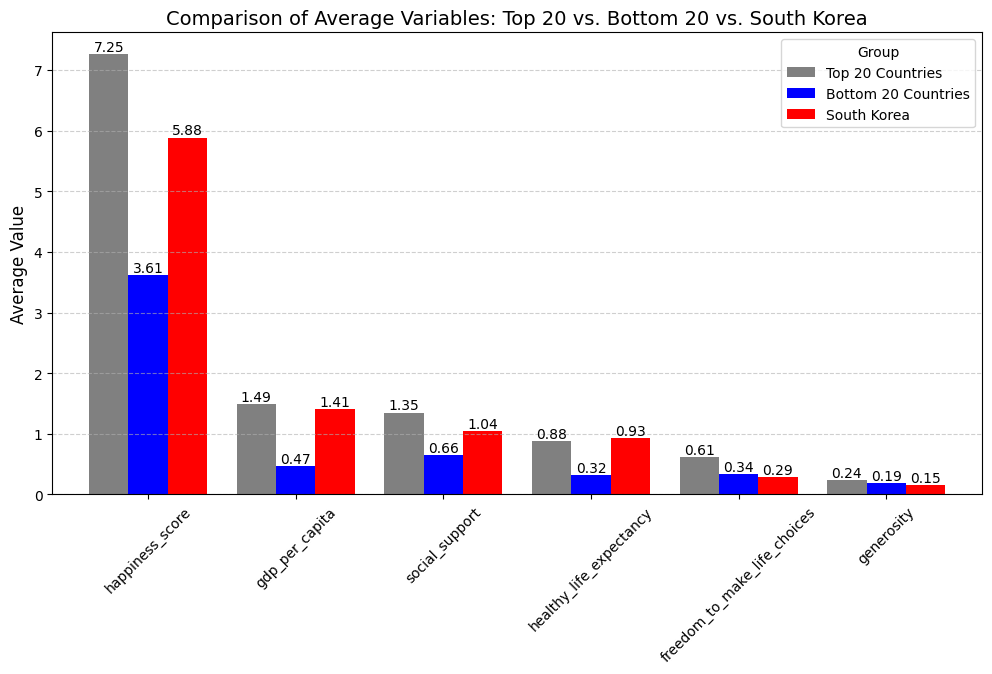

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# 비교할 변수 리스트 정의
variables = ['happiness_score', 'gdp_per_capita', 'social_support',
             'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity']

# 한국 데이터
target_country = "South Korea"

# 상위 20개국 평균값 계산
top_20_countries = merged_df.groupby('country').mean().nlargest(20, 'happiness_score').reset_index()
avg_top_20 = merged_df[merged_df["country"].isin(top_20_countries["country"])][variables].mean()

# 하위 20개국 평균값 계산
bottom_20_countries = merged_df.groupby('country').mean().nsmallest(20, 'happiness_score').reset_index()
avg_bottom_20 = merged_df[merged_df["country"].isin(bottom_20_countries["country"])][variables].mean()

# 대한민국 평균값 계산
avg_korea = merged_df[merged_df["country"] == target_country][variables].mean()

# 데이터프레임 생성 (상위 20개 국가, 하위 20개 국가, 한국 비교)
comparison_df = pd.DataFrame({
    "Top 20 Countries": avg_top_20,
    "Bottom 20 Countries": avg_bottom_20,
    target_country: avg_korea
})

# 그래프 생성
plt.figure(figsize=(12, 6))
ax = comparison_df.plot(kind="bar", figsize=(12, 6), width=0.8, color=["gray", "blue", "red"])

plt.title(f"Comparison of Average Variables: Top 20 vs. Bottom 20 vs. {target_country}", fontsize=14)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Group")

# 막대 위에 수치 표시
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.show()


한국의 행복지수 순위

In [56]:
# 국가별 행복지수 평균 계산
avg_happiness = merged_df.groupby('country')['happiness_score'].mean().reset_index()

# 내림차순 정렬
avg_happiness = avg_happiness.sort_values(by='happiness_score', ascending=False).reset_index(drop=True)

# 한국의 순위 확인
korea_rank = avg_happiness[avg_happiness['country'] == 'South Korea'].index[0] + 1

# 결과 출력
print(f"2018-2022년 평균 행복지수 기준 한국의 순위: {korea_rank}위")


2018-2022년 평균 행복지수 기준 한국의 순위: 61위


<한국>
- GDP, 건강 기대 수명 높음
- 행복 지수, 사회적 지원, 삶의 선택 자유도, 관대함은 낮음

- 하위 20개 국가보다 삶의 선택 자유도와 관대함이 낮은 것으로 보임

- 의료 비용이 높아도 건강에 대한 인식이 높으면 건강 기대 수명은 높음
따라서 의료 불평등이 심화되지 않는 정책들이 유지되어야함.

- 삶의 자유도를 높일 수 있는 정책을 만들어야함.